## Development

In [48]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import requests

sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

In [33]:
def categorical_feature_study(_df, feature, horizontal=False, treshould=0, plot=True):
    df = _df.copy()
    df = df[feature].value_counts().to_frame()
    
    if treshould>0 :
        df = df[ df[feature] >= treshould ]
    
    df = df.reset_index()
    df = df.rename(columns={feature: "Count"})
    df = df.rename(columns={"index": feature})
       
    if plot:
        fig, ax = pyplot.subplots()#figsize=(20,15))
    
        if horizontal :
            sns.barplot(x="Count", y=feature, data=df, ax=ax)
        else:
            sns.barplot(x=feature, y="Count", data=df, ax=ax)
        
        ax.plot()

    return df

In [99]:
# O ficheiro é demasiado grande para o github
df = pd.read_csv('/home/bsilva/Downloads/parking-tickets-2017-2019_WDL.csv', sep=';', index_col=0,
                 parse_dates=['EntryDate'])
df

/home/bsilva/anaconda3/envs/WDL/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Block,Street,EntryDate,Bylaw,Section,Status,InfractionText,Year,HBLOCK
0,1400,Kingsway,2017-08-23,2849,17.1,IS,STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS STOPPING,2017,1400 KINGSWAY
1,2100,13th Ave E.,2017-08-26,2849,19.1(H),IS,STOP ON EITHER SIDE OF A LANE WHICH ABUTS COMMERCIALLY USED PROPERTY,2017,2100 13TH AVE E
2,2800,Trinity St.,2017-08-26,2849,17.6(B),VA,"PARK ON A STREET WHERE A TRAFFIC SIGN RESTRICTS PARKING, EXCEPT IN ACCORDANCE WITH SUCH RESTRICTION",2017,2800 TRINITY ST
3,200,17th Ave W.,2017-08-27,2849,17.5(B),IS,STOP WITHIN 6 METRES OF THE NEAREST EDGE OF THE CLOSEST SIDEWALK ON AN INTERSECTING STREET,2017,200 17TH AVE W
4,1900,4th Ave W.,2017-08-19,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW,2017,1900 4TH AVE W
...,...,...,...,...,...,...,...,...,...
1318730,1000,Smithe St.,2017-04-23,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW,2017,1000 SMITHE ST
1318731,2500,Yew St.,2017-04-24,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW,2017,2500 YEW ST
1318732,600,Seymour St.,2017-04-20,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW,2017,600 SEYMOUR ST
1318733,1300,Robson St.,2017-04-22,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW,2017,1300 ROBSON ST


In [100]:
df['InfractionText'] = df['InfractionText'].str.rstrip('.')

In [101]:
def eda_to_df(df):
    header="+" + ("-"*52) + "+"
    form = "+{:^16s}|{:^16s}|{:^10s}|{:^7s}|"
    print(header)
    print(form.format("Column", "Type", "Uniques", "NaN?"))
    print(header)
    for col in df.columns:
        print(form.format(str(col), str(df[col].dtypes), str(len(df[col].unique())), 
                          str(df[col].isnull().values.any()) ))
    print(header)
eda_to_df(df)

+----------------------------------------------------+
+     Column     |      Type      | Uniques  | NaN?  |
+----------------------------------------------------+
+     Block      |     int64      |   129    | False |
+     Street     |     object     |   1785   | False |
+   EntryDate    | datetime64[ns] |   1089   | False |
+     Bylaw      |     int64      |    5     | False |
+    Section     |     object     |    98    | False |
+     Status     |     object     |    5     | False |
+ InfractionText |     object     |    99    | False |
+      Year      |     int64      |    3     | False |
+     HBLOCK     |     object     |  15219   | False |
+----------------------------------------------------+


## Holiday dataset

In [102]:
holiday_df = pd.read_csv('holidays.csv', sep=',',parse_dates=['date'])
holiday_df.head(5)

,date,holiday
0,2017-01-01,New Year's Day
1,2017-02-20,Family Day
2,2017-04-14,Good Friday
3,2017-05-22,Victoria Day
4,2017-07-03,Canada Day


In [103]:
df_parking_holidays = pd.merge(df,holiday_df, how='left', left_on='EntryDate', right_on='date').drop(columns= ['date'])
#df_parking_holidays[df_parking_holidays['EntryDate'] == '2017-02-20'] #look at infraction in one holliday
df_parking_holidays.head(10)

,Block,Street,EntryDate,Bylaw,Section,Status,InfractionText,Year,HBLOCK,holiday
0,1400,Kingsway,2017-08-23,2849,17.1,IS,STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS STOPPING,2017,1400 KINGSWAY,NaN
1,2100,13th Ave E.,2017-08-26,2849,19.1(H),IS,STOP ON EITHER SIDE OF A LANE WHICH ABUTS COMMERCIALLY USED PROPERTY,2017,2100 13TH AVE E,NaN
2,2800,Trinity St.,2017-08-26,2849,17.6(B),VA,"PARK ON A STREET WHERE A TRAFFIC SIGN RESTRICTS PARKING, EXCEPT IN ACCORDANCE WITH SUCH RESTRICTION",2017,2800 TRINITY ST,NaN
3,200,17th Ave W.,2017-08-27,2849,17.5(B),IS,STOP WITHIN 6 METRES OF THE NEAREST EDGE OF THE CLOSEST SIDEWALK ON AN INTERSECTING STREET,2017,200 17TH AVE W,NaN
4,1900,4th Ave W.,2017-08-19,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW,2017,1900 4TH AVE W,NaN
5,1900,4th Ave W.,2017-08-19,2952,5(4)(a)(ii),WR,PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW,2017,1900 4TH AVE W,NaN
6,700,Richards St.,2017-08-19,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW,2017,700 RICHARDS ST,NaN
7,1000,Mainland St,2017-08-20,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW,2017,1000 MAINLAND ST,NaN
8,500,8th Ave W.,2017-08-20,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW,2017,500 8TH AVE W,NaN
9,500,7th Ave W.,2017-08-20,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER HEAD DISPLAYS FOUR FLASHING ZEROS IN A WINDOW,2017,500 7TH AVE W,NaN


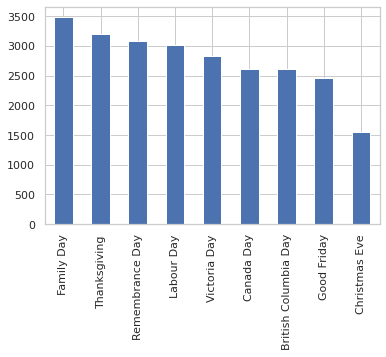

In [91]:
df_holiday_infraction_count = df_parking_holidays.holiday.value_counts().plot(kind='bar')

In [76]:
holiday_df.holiday.unique()

array(["New Year's Day", 'Family Day', 'Good Friday', 'Victoria Day',
       'Canada Day', 'British Columbia Day', 'Labour Day', 'Thanksgiving',
       'Remembrance Day', 'Christmas Eve', 'Christmas Day'], dtype=object)

Family day, Thanksgiving, Remembrance day and Victoria day are the holidays with the most infractions.  
Note the absence of 2 holidays: christmas day and new year's day. Because stores, attractions and many services are closed in these holidays, there is less traffic and perhaps less fiscalization.

### Create new dataset for timeseries analysis on oracle

In [106]:
df_parking_holidays_count = df_parking_holidays\
    .groupby(['InfractionText', 'EntryDate', 'holiday'], dropna=False, as_index=False)['Street'].count().\
    rename(columns={'Street':'Street_count'})
pd.set_option('max_colwidth', 400)
df_parking_holidays_count.head(40)

,InfractionText,EntryDate,holiday,Street_count
0,A PERSON MUST PARK A VEHICLE ENTIRELY WITHIN A METERED SPACE AS DEFINED IN SECTION 2(2),2017-01-04,NaN,1
1,A PERSON MUST PARK A VEHICLE ENTIRELY WITHIN A METERED SPACE AS DEFINED IN SECTION 2(2),2017-01-07,NaN,1
2,A PERSON MUST PARK A VEHICLE ENTIRELY WITHIN A METERED SPACE AS DEFINED IN SECTION 2(2),2017-01-19,NaN,2
3,A PERSON MUST PARK A VEHICLE ENTIRELY WITHIN A METERED SPACE AS DEFINED IN SECTION 2(2),2017-01-30,NaN,1
4,A PERSON MUST PARK A VEHICLE ENTIRELY WITHIN A METERED SPACE AS DEFINED IN SECTION 2(2),2017-02-03,NaN,3
5,A PERSON MUST PARK A VEHICLE ENTIRELY WITHIN A METERED SPACE AS DEFINED IN SECTION 2(2),2017-02-07,NaN,1
6,A PERSON MUST PARK A VEHICLE ENTIRELY WITHIN A METERED SPACE AS DEFINED IN SECTION 2(2),2017-02-10,NaN,1
7,A PERSON MUST PARK A VEHICLE ENTIRELY WITHIN A METERED SPACE AS DEFINED IN SECTION 2(2),2017-02-18,NaN,1
8,A PERSON MUST PARK A VEHICLE ENTIRELY WITHIN A METERED SPACE AS DEFINED IN SECTION 2(2),2017-02-27,NaN,1
9,A PERSON MUST PARK A VEHICLE ENTIRELY WITHIN A METERED SPACE AS DEFINED IN SECTION 2(2),2017-03-01,NaN,1


## Open Weather analysis (NO DATA!!!!)

In [105]:
df_parking_holidays_count_by_street_and_day = df_parking_holidays\
    .groupby(['Street','EntryDate', 'holiday'], dropna=False, as_index=False)['InfractionText'].count().\
    rename(columns={'InfractionText':'InfractionText_count'})
pd.set_option('max_colwidth', 400)
df_parking_holidays_count_by_street_and_day.head(40)

,Street,EntryDate,holiday,InfractionText_count
0,10th Ave E.,2017-01-03,NaN,3
1,10th Ave E.,2017-01-04,NaN,2
2,10th Ave E.,2017-01-05,NaN,2
3,10th Ave E.,2017-01-06,NaN,9
4,10th Ave E.,2017-01-07,NaN,3
5,10th Ave E.,2017-01-09,NaN,1
6,10th Ave E.,2017-01-10,NaN,3
7,10th Ave E.,2017-01-11,NaN,3
8,10th Ave E.,2017-01-12,NaN,1
9,10th Ave E.,2017-01-13,NaN,2


### Common infractions on each holiday

In [44]:
df_parking_holidays_only = df_parking_holidays[df_parking_holidays['holiday'].notnull()]
df_parking_holidays_only = df_parking_holidays_only.groupby('holiday')
df_parking_holidays_only.head()

24860


## Weather

In [60]:

def get_lat_lon(district_name, country_code):
    print("Retrieving Lat and Long of {0} ({1}...".format(city_name, country_code))

    # If no city name is available then use district instead
    #if city_name in conversion_dic:
    #    city_name=conversion_dic[city_name]
    
    url = "http://api.openweathermap.org/geo/1.0/direct?q=" + city_name + ","+country_code+"&appid=155b4d6acbf49ae8044c54f654953578"

    request_json=requests.get(url).json()
    if len(request_json)==0:
        return get_history(district_name, district_name)
        
    return (request_json[0]["lat"], request_json[0]["lon"])


def get_air_polution(lat, lon, metric):
    print("Retrieving {0} ({1}) air polution...".format(lat, lon))
    
    url = "http://api.openweathermap.org/data/2.5/air_pollution?lat={0}&lon={1}&appid=155b4d6acbf49ae8044c54f654953578".format(lat, lon)

    request_json=requests.get(url).json()
        
    if metric==None:
        return request_json["list"][0]["main"]["aqi"]
    else:
        return request_json["list"][0]["components"][metric]
    
def get_history(city_name, country_code):
    print("Retrieving {0} ({1}) history...".format(city_name, country_code))

    # If no city name is available then use district instead
    #if city_name in conversion_dic:
    #    city_name=conversion_dic[city_name]
    
    url = "http://history.openweathermap.org/data/2.5/aggregated/year?q="\
                + city_name+","+country_code+"&appid=" + "155b4d6acbf49ae8044c54f654953578" \
                + "&start=2020-11-01" \
                + "&end=2020-12-31" \

    request_json=requests.get(url).json()
        
    return pd.json_normalize(request_json["result"])

def get_agg_metric(district, city, col, agg_metric):
    df=get_history(district, city)
    return df.agg({col: agg_metric})[0] 

In [61]:
vancouver_weather_df=get_history("Vancouver", "CA")
print(vancouver_weather_df.columns)
vancouver_weather_df.head()

Retrieving Vancouver (CA) history...
Index(['month', 'day', 'temp.record_min', 'temp.record_max',
       'temp.average_min', 'temp.average_max', 'temp.median', 'temp.mean',
       'temp.p25', 'temp.p75', 'temp.st_dev', 'temp.num', 'pressure.min',
       'pressure.max', 'pressure.median', 'pressure.mean', 'pressure.p25',
       'pressure.p75', 'pressure.st_dev', 'pressure.num', 'humidity.min',
       'humidity.max', 'humidity.median', 'humidity.mean', 'humidity.p25',
       'humidity.p75', 'humidity.st_dev', 'humidity.num', 'wind.min',
       'wind.max', 'wind.median', 'wind.mean', 'wind.p25', 'wind.p75',
       'wind.st_dev', 'wind.num', 'precipitation.min', 'precipitation.max',
       'precipitation.median', 'precipitation.mean', 'precipitation.p25',
       'precipitation.p75', 'precipitation.st_dev', 'precipitation.num',
       'clouds.min', 'clouds.max', 'clouds.median', 'clouds.mean',
       'clouds.p25', 'clouds.p75', 'clouds.st_dev', 'clouds.num'],
      dtype='object')


,month,day,temp.record_min,temp.record_max,temp.average_min,temp.average_max,temp.median,temp.mean,temp.p25,temp.p75,...,precipitation.st_dev,precipitation.num,clouds.min,clouds.max,clouds.median,clouds.mean,clouds.p25,clouds.p75,clouds.st_dev,clouds.num
0,1,1,267.15,284.13,273.64,277.86,274.69,275.68,273.55,279.31,...,0.23,216,0,100,40.0,45.11,1.0,90.0,40.65,216
1,1,2,268.12,285.34,273.83,278.26,275.64,275.50,272.51,278.69,...,0.25,216,0,92,75.0,52.16,5.0,90.0,38.50,216
2,1,3,264.39,283.99,272.53,278.36,276.06,275.62,272.92,278.57,...,0.44,216,0,100,75.0,59.94,20.0,90.0,36.94,216
3,1,4,264.39,284.29,274.05,278.59,275.76,275.94,273.03,279.42,...,0.51,216,0,100,75.0,57.03,20.0,90.0,38.65,216
4,1,5,263.61,283.25,274.04,278.41,277.30,275.97,273.51,278.80,...,1.63,216,0,100,90.0,59.27,1.0,90.0,40.05,216


## Conclusions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

### Future Work
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀